<a href="https://colab.research.google.com/github/JonPaulBIlbao/ML-Finance-DBS/blob/Learning-R/Example_R_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is a colab notebook running R.**
We generate 500 random values from a normal distribution

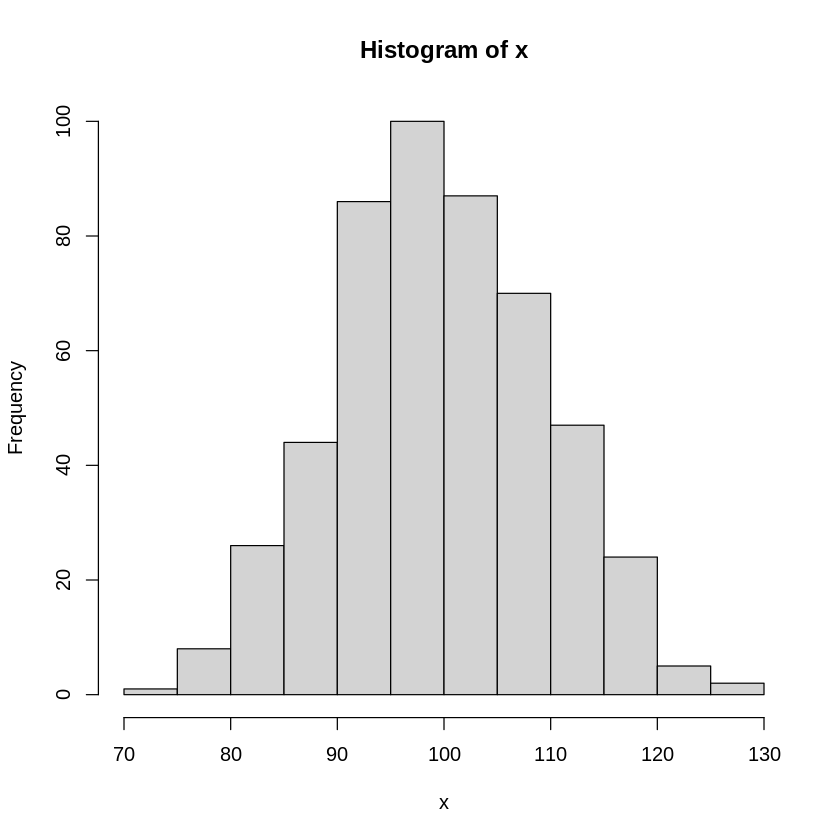

In [ ]:
x <- rnorm(n=500, mean=100, sd=10)
hist(x)

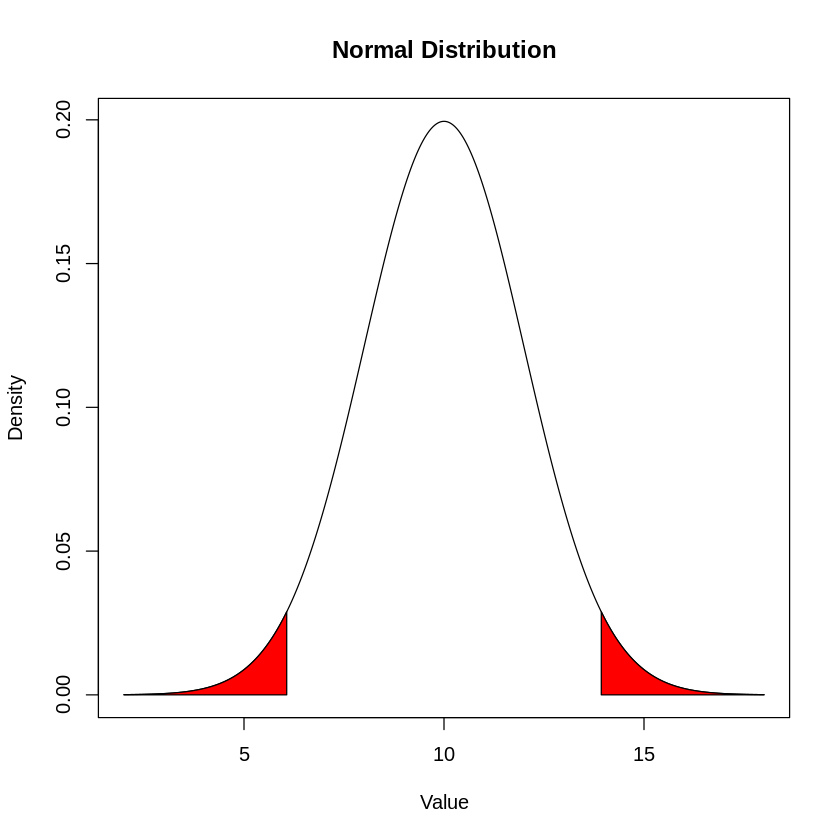

In [ ]:
# prompt: Draw a normal distribution with mean=10 and standard deviation=2, fill with red color both tails 2.5% probability

# Define parameters
mean_val <- 10
sd_val <- 2

# Create a sequence of x-values
x <- seq(mean_val - 4 * sd_val, mean_val + 4 * sd_val, length.out = 1000)

# Calculate the probability density function (PDF)
y <- dnorm(x, mean = mean_val, sd = sd_val)

# Calculate quantiles for the tails (2.5% on each side)
lower_bound <- qnorm(0.025, mean = mean_val, sd = sd_val)
upper_bound <- qnorm(0.975, mean = mean_val, sd = sd_val)


# Create the plot
plot(x, y, type = "l", xlab = "Value", ylab = "Density", main = "Normal Distribution")

# Find indices of x values that are in the tails
lower_tail_indices <- which(x <= lower_bound)
upper_tail_indices <- which(x >= upper_bound)

# Fill the tails with red
polygon(c(x[lower_tail_indices], rev(x[lower_tail_indices])),
        c(y[lower_tail_indices], rep(0, length(lower_tail_indices))), col = "red")
polygon(c(x[upper_tail_indices], rev(x[upper_tail_indices])),
        c(y[upper_tail_indices], rep(0, length(upper_tail_indices))), col = "red")


Let's have a look at the TELECOM churn data

In [ ]:
data <- read.csv('https://raw.githubusercontent.com/JonPaulBIlbao/ML-Finance-DBS/Logistic-regression/churn.csv')


In [ ]:
str(data)


'data.frame':	3333 obs. of  21 variables:
 $ State         : chr  "KS" "OH" "NJ" "OH" ...
 $ Account.Length: int  128 107 137 84 75 118 121 147 117 141 ...
 $ Area.Code     : int  415 415 415 408 415 510 510 415 408 415 ...
 $ Phone         : chr  "382-4657" "371-7191" "358-1921" "375-9999" ...
 $ Intl.Plan     : chr  "no" "no" "no" "yes" ...
 $ VMail.Plan    : chr  "yes" "yes" "no" "no" ...
 $ VMail.Message : int  25 26 0 0 0 0 24 0 0 37 ...
 $ Day.Mins      : num  265 162 243 299 167 ...
 $ Day.Calls     : int  110 123 114 71 113 98 88 79 97 84 ...
 $ Day.Charge    : num  45.1 27.5 41.4 50.9 28.3 ...
 $ Eve.Mins      : num  197.4 195.5 121.2 61.9 148.3 ...
 $ Eve.Calls     : int  99 103 110 88 122 101 108 94 80 111 ...
 $ Eve.Charge    : num  16.78 16.62 10.3 5.26 12.61 ...
 $ Night.Mins    : num  245 254 163 197 187 ...
 $ Night.Calls   : int  91 103 104 89 121 118 118 96 90 97 ...
 $ Night.Charge  : num  11.01 11.45 7.32 8.86 8.41 ...
 $ Intl.Mins     : num  10 13.7 12.2 6.6 10.1 6

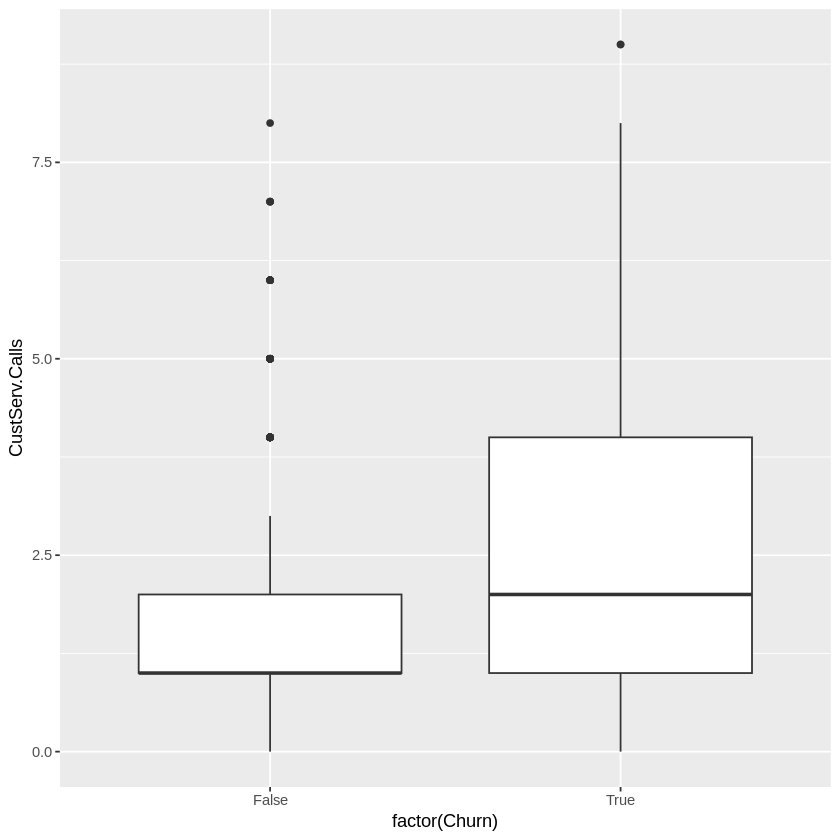

In [ ]:
# prompt: Draw boxplots with Churn as factor and CustServ.Calls as metric

library(ggplot2)
ggplot(data, aes(x = factor(Churn), y = CustServ.Calls)) +
  geom_boxplot()


In [ ]:
# prompt: Show correlation matrix for all metric variables in data

cor(data[, sapply(data, is.numeric)])


,Account.Length,Area.Code,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls
Account.Length,1.000000000,-0.012463497,-0.0046278243,0.0062160205,0.038469882,0.0062141347,-0.006757142,0.019259967,-0.006745302,-0.008955192,-0.0131762751,-0.008959535,0.009513902,0.0206614284,0.009545675,-0.003795939
Area.Code,-0.012463497,1.000000000,-0.0019943701,-0.0082643662,-0.009646044,-0.0082644411,0.003580395,-0.011886271,0.003606690,-0.005824660,0.0165223169,-0.005845376,-0.018288168,-0.0241785887,-0.018394696,0.027572226
VMail.Message,-0.004627824,-0.001994370,1.0000000000,0.0007782741,-0.009548068,0.0007755235,0.017562034,-0.005864351,0.017577780,0.007681136,0.0071230629,0.007663290,0.002856196,0.0139573387,0.002883658,-0.013262583
Day.Mins,0.006216021,-0.008264366,0.0007782741,1.0000000000,0.006750414,0.9999999522,0.007042511,0.015768993,0.007029035,0.004323367,0.0229724555,0.004300357,-0.010154586,0.0080333570,-0.010091974,-0.013423186
Day.Calls,0.038469882,-0.009646044,-0.0095480677,0.0067504139,1.000000000,0.0067529620,-0.021451408,0.006462114,-0.021449263,0.022937845,-0.0195569654,0.022926638,0.021564794,0.0045742682,0.021666095,-0.018941930
Day.Charge,0.006214135,-0.008264441,0.0007755235,0.9999999522,0.006752962,1.0000000000,0.007049607,0.015769282,0.007036131,0.004323879,0.0229724195,0.004300861,-0.010156862,0.0080315720,-0.010094257,-0.013426969
Eve.Mins,-0.006757142,0.003580395,0.0175620343,0.0070425110,-0.021451408,0.0070496072,1.000000000,-0.011430108,0.999999776,-0.012583678,0.0075856431,-0.012592806,-0.011034714,0.0025412917,-0.011066621,-0.012984553
Eve.Calls,0.019259967,-0.011886271,-0.0058643513,0.0157689932,0.006462114,0.0157692822,-0.011430108,1.000000000,-0.011422894,-0.002092768,0.0077097055,-0.002055984,0.008702881,0.0174336921,0.008673858,0.002422575
Eve.Charge,-0.006745302,0.003606690,0.0175777801,0.0070290353,-0.021449263,0.0070361315,0.999999776,-0.011422894,1.000000000,-0.012592020,0.0075958430,-0.012601142,-0.011042582,0.0025414580,-0.011074499,-0.012987407
Night.Mins,-0.008955192,-0.005824660,0.0076811359,0.0043233666,0.022937845,0.0043238794,-0.012583678,-0.002092768,-0.012592020,1.000000000,0.0112038563,0.999999215,-0.015207297,-0.0123534324,-0.015179849,-0.009287613


In [ ]:
# prompt: Calculate overall churn rate
data$Churn_num <- ifelse(data$Churn=="True",1,0)
summary(data)
# Calculate the overall churn rate
churn_rate <- sum(data$Churn_num) / nrow(data)
print(paste("Overall churn rate:", churn_rate))

    State           Account.Length    Area.Code        Phone          
 Length:3333        Min.   :  1.0   Min.   :408.0   Length:3333       
 Class :character   1st Qu.: 74.0   1st Qu.:408.0   Class :character  
 Mode  :character   Median :101.0   Median :415.0   Mode  :character  
                    Mean   :101.1   Mean   :437.2                     
                    3rd Qu.:127.0   3rd Qu.:510.0                     
                    Max.   :243.0   Max.   :510.0                     
  Intl.Plan          VMail.Plan        VMail.Message       Day.Mins    
 Length:3333        Length:3333        Min.   : 0.000   Min.   :  0.0  
 Class :character   Class :character   1st Qu.: 0.000   1st Qu.:143.7  
 Mode  :character   Mode  :character   Median : 0.000   Median :179.4  
                                       Mean   : 8.099   Mean   :179.8  
                                       3rd Qu.:20.000   3rd Qu.:216.4  
                                       Max.   :51.000   Max.   :350.8  

[1] "Overall churn rate: 0.144914491449145"


In [ ]:
# prompt: Show rates with churn rates as percentage by state ordered from higher to lower, add two columns for the numerator and denominator of churn rate

library(dplyr)

data %>%
  group_by(State) %>%
  summarize(
    churn_numerator = sum(Churn_num),
    churn_denominator = n(),
    churn_rate = churn_numerator / churn_denominator
  ) %>%
  arrange(desc(churn_rate)) %>%
  mutate(churn_rate = scales::percent(churn_rate))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




State,churn_numerator,churn_denominator,churn_rate
<chr>,<dbl>,<int>,<chr>
CA,9,34,26.471%
NJ,18,68,26.471%
TX,18,72,25.000%
MD,17,70,24.286%
SC,14,60,23.333%
MI,16,73,21.918%
MS,14,65,21.538%
NV,14,66,21.212%
WA,14,66,21.212%
